# Assumption
$$f(n)= \frac{1}{\sigma \cdot \sqrt{2 \pi}} \cdot e ^{-\frac{1}{2} (\frac{n-\mu}{\sigma})^2} =  (\frac{1}{2})^M \frac{1}{N} \sum_{\omega = 0}^\pi (1+e^{-j\omega})^{M} e^{j\omega n}$$

Approximated numerically:

$$\sigma \approx \sqrt{M 0.23100029 + 0.56229075} $$

$$\mu \approx M 0.5 + 0.47834 $$

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def ndist2(M):
    n = arange(M)
    return np.math.factorial(M)/(np.math.factorial(M-n)*np.math.factorial(M))

In [5]:
# plot(ndist2(5))

In [12]:
import tikzplotlib

In [22]:
def myFilt (x):
    y = zeros_like(x)
    for n in range(len(x)):
        y[n] = (x[n]+x[n-1])
    return y

def MfiltersIR(M, N=100):
    impSig = zeros(N)
    impSig[0] = 1
    y = impSig
    for i in range(M):
        y = myFilt(y)
    return y*((1/2)**(i+1))

def normdist(x, sigma, mu):
    return (1/(sigma*sqrt(2*pi))) * exp(-1/2 * ((x-mu)/sigma)**2)
    

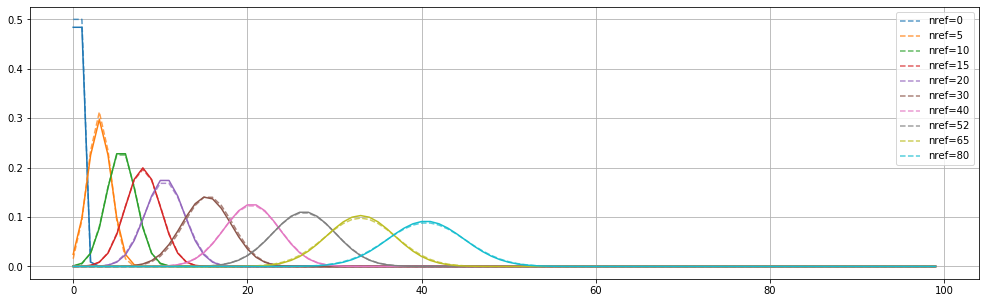

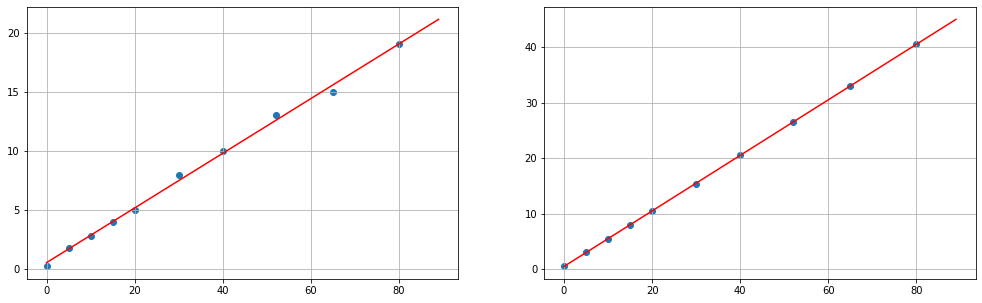

In [23]:
# nRefl =90
M = 90
N = 100
impSig = zeros(N)
impSig[0] = 1

y = impSig
figure(figsize=[17,5])
nrefColl = np.array([0,5,10,15,20,30,40,52, 65,80]) #15, 30, 52
for i in range(M):
    y = myFilt(y)
    if i in nrefColl:
        plot(y*((1/2)**(i+1)),'--',alpha=0.74, label='nref={}'.format(i))


x = arange(N)

offsets= np.array([0.5, 3, 5.5, 8, 10.5, 15.3, 20.5,26.5, 33, 40.5])
sigmas = np.array([0.5,sqrt(1.8), sqrt(2.8), sqrt(4), sqrt(5), sqrt(8), sqrt(10), sqrt(13), sqrt(15), sqrt(19)])

for i in range(len(offsets)):
    plot(x,normdist(x,sigmas[i], offsets[i]))


legend()

grid()
show()

figure(figsize=[17,5])
subplot(121)
scatter(nrefColl, sigmas**2)
x = arange(M)
sigmaPoly = np.poly1d(np.polyfit(nrefColl, sigmas**2, 1))
y = sigmaPoly(x)
plot(x,y, 'r')
grid()

subplot(122)
scatter(nrefColl, offsets)
offsetPoly = np.poly1d(np.polyfit(nrefColl, offsets, 1))
y = offsetPoly(x)
plot(x,y,'r')
grid()
show()

/home/patrik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


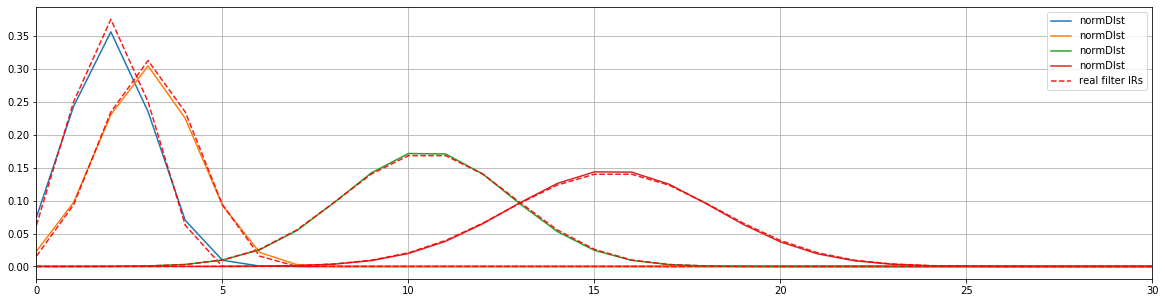

In [38]:
figure(figsize=[20,5])
Ms = [3,5, 20, 30]
maximums = []
rmaximums = []

for i,M in enumerate(Ms):

    N = 100
    x = zeros(N)
    omega = linspace(0,pi,N)
    for n in range(N):
        for om in omega:
            x[n] += (((1+exp(-1j*om))**M *exp(1j*om*n))/N)*(1/2)**M

#     plot(x.real, label = 'inverse fourier')

    test2 = MfiltersIR(M+1)
    plot(normdist(arange(N),sqrt(sigmaPoly(M)),offsetPoly(M) ), label='normDIst')
    if i == len(Ms)-1:
        plot(test2,'r--', label = "real filter IRs", alpha=0.9)
    else:
        plot(test2,'r--', alpha=0.9)
    legend()
    

    
xlim([0,30])
grid()
fName = 'normDist'
tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.4f')
show()